In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data Exploring and Cleaning

## Read Data

In [2]:
import sklearn as sk

In [3]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv' , index_col= 'Id')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

Test_data_Id = test_data["Id"]

data_with_label = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv' , index_col= 'Id')
data_with_label.dropna(axis=0, subset=['SalePrice'], inplace=True)

In [4]:
data_with_label.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
top_corr_features = data_with_label.corr()['SalePrice'].sort_values(ascending=False)
top_corr_features

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

# Decide Which features Important

In [7]:
categorical_feature = ["Utilities" ,"Neighborhood",  "Condition1" , "Condition2","BldgType" ,
               "HouseStyle"  , "Exterior1st",
               "Exterior2nd","Foundation" ,"BsmtQual" ,"BsmtExposure"  , "BsmtFinType1" ,"BsmtFinType2",
                "HeatingQC" , "CentralAir" , "Electrical" ,"KitchenQual", "SaleType","SaleCondition"]


numerical_feature = ["LotFrontage" , "LotArea" ,"BsmtFinSF1" ,"1stFlrSF" , "2ndFlrSF" , "FullBath",
                     "TotRmsAbvGrd"  ,"3SsnPorch","ScreenPorch", "PoolArea", "OverallQual","OverallCond" ,"YearRemodAdd"
                    ,"BsmtFinSF2","TotalBsmtSF" ,"GarageCars"]
important_features = categorical_feature+numerical_feature+["SalePrice"]
test_features = categorical_feature+numerical_feature

# clean Training Data

In [8]:
train_features = train_data[important_features]
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1460 non-null   object 
 1   Neighborhood   1460 non-null   object 
 2   Condition1     1460 non-null   object 
 3   Condition2     1460 non-null   object 
 4   BldgType       1460 non-null   object 
 5   HouseStyle     1460 non-null   object 
 6   Exterior1st    1460 non-null   object 
 7   Exterior2nd    1460 non-null   object 
 8   Foundation     1460 non-null   object 
 9   BsmtQual       1423 non-null   object 
 10  BsmtExposure   1422 non-null   object 
 11  BsmtFinType1   1423 non-null   object 
 12  BsmtFinType2   1422 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1459 non-null   object 
 16  KitchenQual    1460 non-null   object 
 17  SaleType       1460 non-null   object 
 18  SaleCond

In [9]:
filling_null = { "BsmtQual" : train_features["BsmtQual"].mode().iloc[0]  ,
                "BsmtExposure" : train_features["BsmtExposure"].mode().iloc[0],
                "BsmtFinType1" : train_features["BsmtFinType1"].mode().iloc[0],
                "BsmtFinType2" : train_features["BsmtFinType2"].mode().iloc[0],    
               "LotFrontage" : train_features["LotFrontage"].mean()   }

train_features = train_features.fillna(value = filling_null)
train_features = train_features.dropna(axis = 0)
train_features.head()
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1459 non-null   object 
 1   Neighborhood   1459 non-null   object 
 2   Condition1     1459 non-null   object 
 3   Condition2     1459 non-null   object 
 4   BldgType       1459 non-null   object 
 5   HouseStyle     1459 non-null   object 
 6   Exterior1st    1459 non-null   object 
 7   Exterior2nd    1459 non-null   object 
 8   Foundation     1459 non-null   object 
 9   BsmtQual       1459 non-null   object 
 10  BsmtExposure   1459 non-null   object 
 11  BsmtFinType1   1459 non-null   object 
 12  BsmtFinType2   1459 non-null   object 
 13  HeatingQC      1459 non-null   object 
 14  CentralAir     1459 non-null   object 
 15  Electrical     1459 non-null   object 
 16  KitchenQual    1459 non-null   object 
 17  SaleType       1459 non-null   object 
 18  SaleCond

# Clean Test Data

In [10]:
test_data = test_data[test_features]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1457 non-null   object 
 1   Neighborhood   1459 non-null   object 
 2   Condition1     1459 non-null   object 
 3   Condition2     1459 non-null   object 
 4   BldgType       1459 non-null   object 
 5   HouseStyle     1459 non-null   object 
 6   Exterior1st    1458 non-null   object 
 7   Exterior2nd    1458 non-null   object 
 8   Foundation     1459 non-null   object 
 9   BsmtQual       1415 non-null   object 
 10  BsmtExposure   1415 non-null   object 
 11  BsmtFinType1   1417 non-null   object 
 12  BsmtFinType2   1417 non-null   object 
 13  HeatingQC      1459 non-null   object 
 14  CentralAir     1459 non-null   object 
 15  Electrical     1459 non-null   object 
 16  KitchenQual    1458 non-null   object 
 17  SaleType       1458 non-null   object 
 18  SaleCond

# One Hot Encoding with Training Data 

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
Encode_features = OneHotEncoder(sparse=False)
features = pd.DataFrame(Encode_features.fit_transform(train_features[categorical_feature] ))
features.columns = Encode_features.get_feature_names(categorical_feature)
# train_features = pd.concat([train_features , pd.DataFrame(features)],axis=1)
train_features[features.columns] = features
train_features = train_features.drop(train_features[categorical_feature] ,axis =1)
train_features = train_features.dropna()
train_features.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,LotFrontage,LotArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,3SsnPorch,ScreenPorch,PoolArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,706,856,854,2,8,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80.0,9600,978,1262,0,2,6,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,68.0,11250,486,920,866,2,6,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,9550,216,961,756,1,7,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,84.0,14260,655,1145,1053,2,9,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split SalePrice As label

In [13]:
train_labels = train_features.SalePrice
train_features.drop(['SalePrice'], axis=1, inplace=True)

# One Hot Encoding test Data

In [14]:
test_data[numerical_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   LotArea       1459 non-null   int64  
 2   BsmtFinSF1    1458 non-null   float64
 3   1stFlrSF      1459 non-null   int64  
 4   2ndFlrSF      1459 non-null   int64  
 5   FullBath      1459 non-null   int64  
 6   TotRmsAbvGrd  1459 non-null   int64  
 7   3SsnPorch     1459 non-null   int64  
 8   ScreenPorch   1459 non-null   int64  
 9   PoolArea      1459 non-null   int64  
 10  OverallQual   1459 non-null   int64  
 11  OverallCond   1459 non-null   int64  
 12  YearRemodAdd  1459 non-null   int64  
 13  BsmtFinSF2    1458 non-null   float64
 14  TotalBsmtSF   1458 non-null   float64
 15  GarageCars    1458 non-null   float64
dtypes: float64(5), int64(11)
memory usage: 182.5 KB


In [15]:
# test_data = test_data.fillna(0)
# test_data.shape

In [16]:
# Clean test Data
# test_data = test_data[test_features]
# test_data = test_data.fillna(value = test_data.mode())

t = pd.DataFrame(Encode_features.fit_transform(test_data[categorical_feature] ))
t.columns = Encode_features.get_feature_names(categorical_feature)
test_data = pd.concat([test_data , pd.DataFrame(t)],axis=1)
test_data = test_data.drop(test_data[categorical_feature] ,axis =1)
# test_data = test_data.fillna(0)
# test_data = test_data.fillna(value = test_data.mode())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
test_data.shape

(1459, 161)

# Take Common features between Train and Test

In [18]:
# common_cols = list(set(train_features.columns).intersection(test_data.columns))
# train_features = train_features[common_cols]
# test_data = test_data[common_cols]

## Split to train and validation

In [19]:
validation_set = train_features.iloc[1100:]
validation_labels = train_labels.iloc[1100:]

train_features = train_features.iloc[0:1100]
train_labels = train_labels.iloc[0:1100]


In [20]:
validation_set.shape

(357, 161)

# apply Linear Regression

In [21]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(train_features, train_labels)
# reg.score(train_features, train_labels)

In [22]:

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=500, random_state=0)
reg.fit(train_features, train_labels)

RandomForestRegressor(max_depth=500, random_state=0)

# Graph of scores vs 10 Parameters

<function matplotlib.pyplot.show(close=None, block=None)>

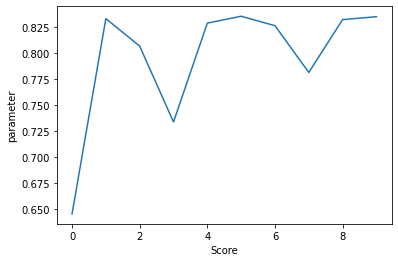

In [23]:
import matplotlib.pyplot as plt
listof_scores = []
list_of_paramters = [2 , 10 , 5 , 3 , 15 , 30 , 9 , 4 , 12 , 35]
for i in list_of_paramters:
    regrr = RandomForestRegressor(max_depth=i, random_state=0)
    regrr.fit(train_features, train_labels)
    listof_scores.append(regrr.score(validation_set, validation_labels))
    
plt.plot(listof_scores)    
plt.xlabel("Score")
plt.ylabel("parameter")
plt.show

In [24]:
# from sklearn.ensemble import GradientBoostingRegressor
# reg = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
# max_depth=2, random_state=0).fit(train_features, train_labels)

# Graph of scores vs 10 alphas

<function matplotlib.pyplot.show(close=None, block=None)>

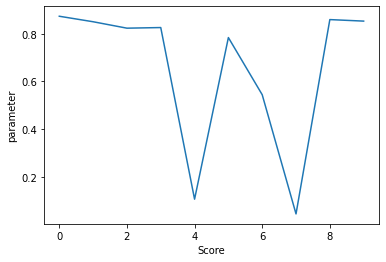

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
listof_scores = []
list_of_alpha = [0.1 , 0.5 , 0.8 , 0.55 , 0.001 , 1.0 , 0.009 , 0.0004 , 0.2 , 0.6]
for i in list_of_alpha:
    regrr = GradientBoostingRegressor(n_estimators=100, learning_rate=i,
            max_depth=2, random_state=0).fit(train_features, train_labels)
    listof_scores.append(regrr.score(validation_set, validation_labels))
    
plt.plot(listof_scores)    
plt.xlabel("Score")
plt.ylabel("parameter")
plt.show

In [26]:
reg.score(train_features, train_labels)

0.9780103074604876

In [27]:
test_data = test_data.fillna(0)
# np.nan_to_num(data)

In [28]:
predection = reg.predict(test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BsmtExposure_nan
- BsmtFinType1_nan
- BsmtFinType2_nan
- BsmtQual_nan
- Exterior1st_nan
- ...
Feature names seen at fit time, yet now missing:
- Condition2_RRAe
- Condition2_RRAn
- Condition2_RRNn
- Electrical_Mix
- Exterior1st_ImStucc
- ...

  warnings.warn(message, FutureWarning)


In [29]:
predections = pd.DataFrame()
predections['Id'] = Test_data_Id
predections['SalePrice'] = predection[0:1459]


In [30]:
predections.shape

(1459, 2)

In [31]:
predections.to_csv("predections.csv", index=None, sep=",")